In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics

In [115]:
iris = datasets.load_iris()
df = pd.DataFrame(iris['data'])
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [116]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [68]:
#run k-means for a range of clusters using a for loop
#collecting distortions into a list
#elbow method
#WCSS: within cluster sum of square
#.inertia_: It is calculated by measuring the distance between each data point 
# and its centroid, squaring this distance, 
# and summing these squares across one cluster
#need to sovle the problem with 1,2... clusters and calculate
#WCSS for each of them
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

Text(0.5, 1.0, 'Elbow method')

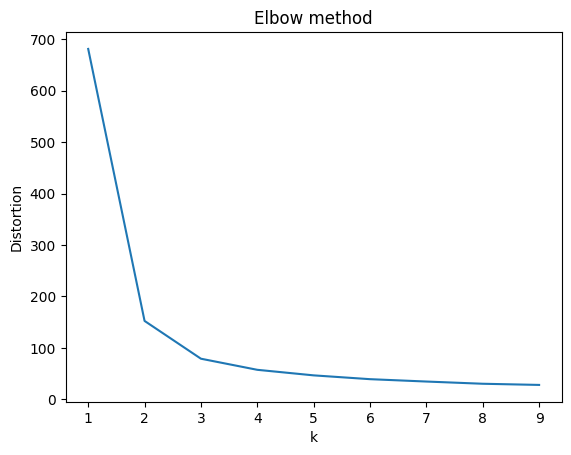

In [69]:
number_clusters = range(1,10)
plt.plot(number_clusters,distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method')

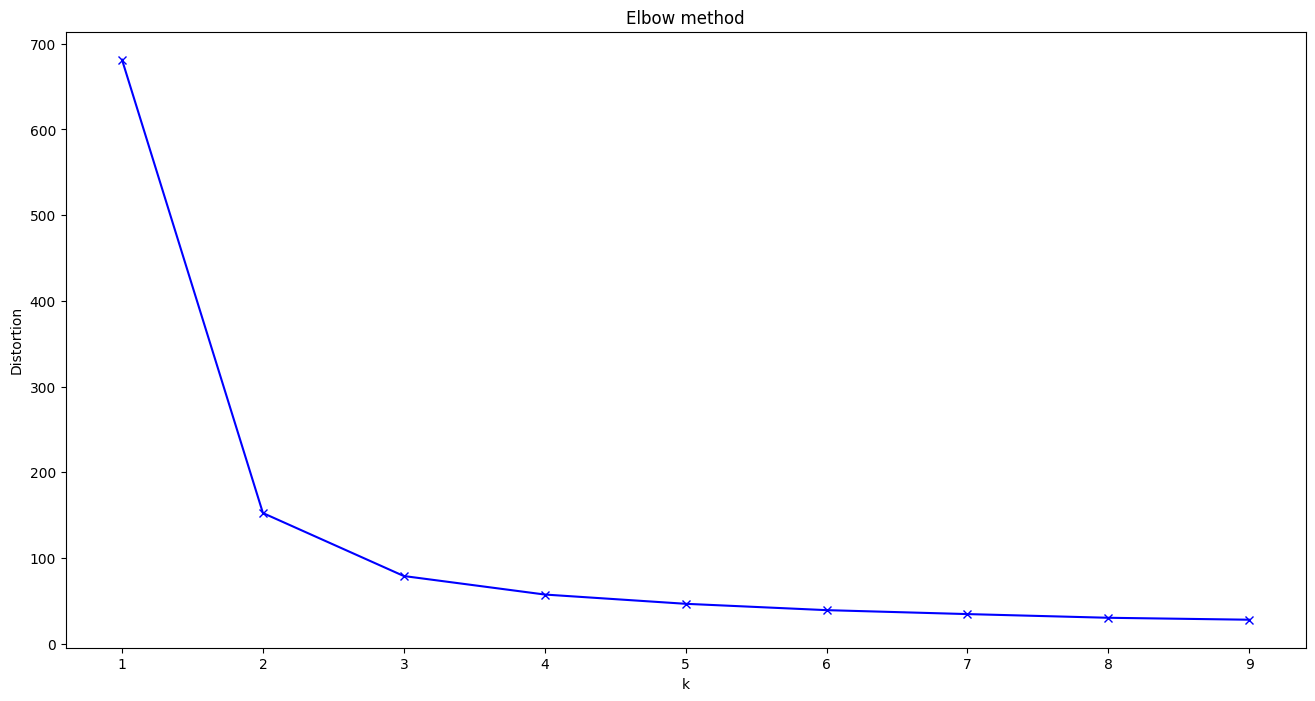

In [70]:
plt.figure(figsize=(16,8))
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method')
plt.show()

In [71]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df) #compute k-means clustering

KMeans(n_clusters=3)

In [72]:
df['k_means'] = kmeanModel.predict(df) 
#Predict the closest cluster each sample in X belongs to.

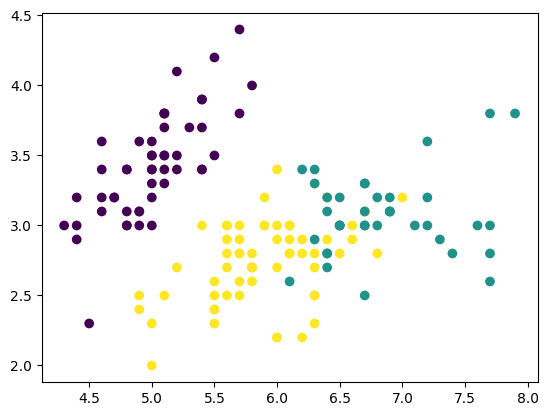

In [73]:
plt.scatter(df[0],df[1],c=kmeanModel.labels_)
plt.show()

In [74]:
df['k_means']=kmeanModel.predict(df)
df['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: X has 5 features, but KMeans is expecting 4 features as input.

In [52]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=5)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


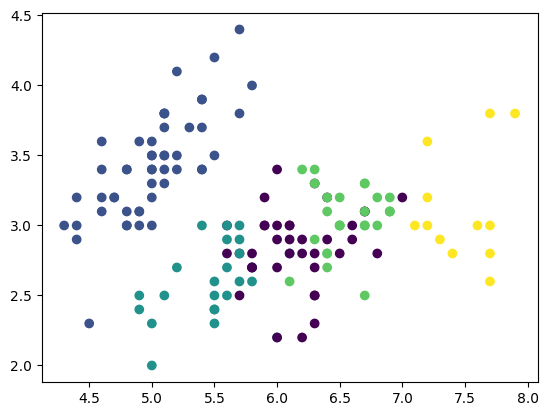

In [53]:
df['k_means'] = kmeanModel.predict(df) 
plt.scatter(df[0],df[1],c=kmeanModel.labels_)
plt.show()

In [ ]:
#silhouette analysis: measure of how similar a data point is 
#within-cluster compared to other clusters
#In short, the average silhouette approach measures the quality of a clustering. 
#That is, it determines how well each object lies within its cluster. 
#A high average silhouette width indicates a good clustering. 
#The average silhouette method computes the average silhouette of observations for different values of k. 
#The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k.

In [117]:
silhouette = []
K = range(2,10) 
#the silhouette score() functions needs a minimum of
#2 clusters, or it will raise an exception
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    score = silhouette_score(df,kmeans.labels_,metric='euclidean')
    silhouette.append(score)

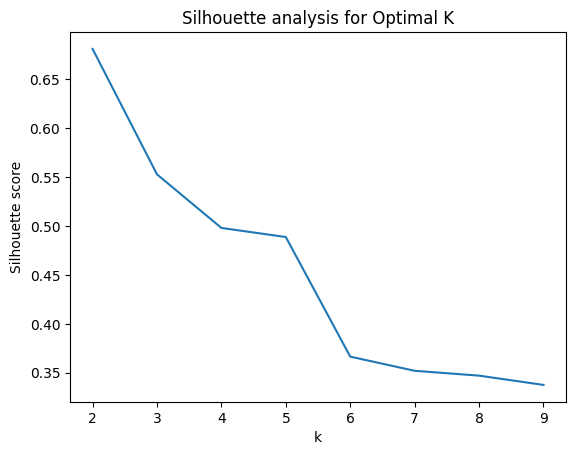

In [118]:
plt.plot(K,silhouette)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for Optimal K')
plt.show()